Time taken for 1 processes: 23.919070720672607 seconds
Time taken for 2 processes: 16.06844210624695 seconds
Time taken for 3 processes: 19.649243593215942 seconds
Time taken for 4 processes: 25.417871475219727 seconds
Time taken for 5 processes: 31.503106832504272 seconds
Time taken for 6 processes: 38.2956440448761 seconds
Time taken for 7 processes: 43.969950675964355 seconds
Time taken for 8 processes: 50.77290391921997 seconds


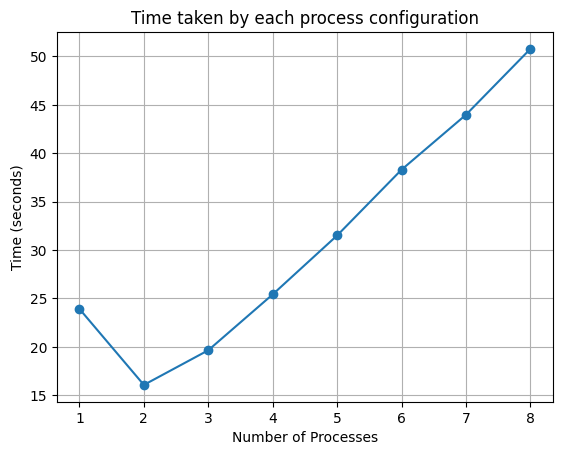

CPU usage: 77.6%


In [18]:
import numpy as np
import time
import matplotlib.pyplot as plt
import psutil
import multiprocessing

# Function to multiply matrices
def matrix_multiply(matrix1, matrix2):
    return np.dot(matrix1, matrix2)

# Function to generate random matrices with larger size
def generate_matrices(size):
    return np.random.randint(10, size=(size, size)), np.random.randint(10, size=(size, size))

# Function to perform matrix multiplication with multiprocessing
def perform_multiplication(num_processes, matrix1, matrix2):
    pool = multiprocessing.Pool(processes=num_processes)
    results = []
    for _ in range(num_processes):
        results.append(pool.apply_async(matrix_multiply, (matrix1, matrix2)))
    pool.close()
    pool.join()
    return [result.get() for result in results]

# Function to plot graph
def plot_graph(processes, times):
    plt.plot(processes, times, marker='o', linestyle='-')
    plt.xlabel('Number of Processes')
    plt.ylabel('Time (seconds)')
    plt.title('Time taken by each process configuration')
    plt.grid(True)
    plt.show()

# Main function
def main():
    matrix_size = 1000  # Increase matrix size to 3000x3000
    constant_matrix_size = 1000
    constant_matrix = np.random.randint(10, size=(constant_matrix_size, constant_matrix_size))

    processes = [1, 2, 3, 4, 5, 6, 7, 8]
    times = []

    for num_processes in processes:
        matrix1, _ = generate_matrices(matrix_size)
        start_time = time.time()
        result = perform_multiplication(num_processes, matrix1, constant_matrix)
        end_time = time.time()
        total_time = end_time - start_time
        times.append(total_time)
        print(f"Time taken for {num_processes} processes: {total_time} seconds")

    # Plot the graph
    plot_graph(processes, times)

    # Monitor CPU usage
    cpu_usage = psutil.cpu_percent()
    print(f"CPU usage: {cpu_usage}%")

if __name__ == "__main__":
    main()
